## Black-Friday

 ### Data
- Downloaded from https://www.kaggle.com/sdolezel/black-friday
- Moto: Black-Friday-Purchase
- Problem Statement - Regression Problem 


### Data Scraping
- Import Libraries


In [1]:
import pandas as pd
import numpy as np
from colorama import *
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

- Import Dataset 
  - Train Dataset
  - Test Dataset

In [2]:
data_train= pd.read_csv('train.csv')
data_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [3]:
data_test= pd.read_csv('test.csv')
data_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


- Veriable Indentification
   - Data Type
   - Missing values
   - Drop the columns
   - Shape

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


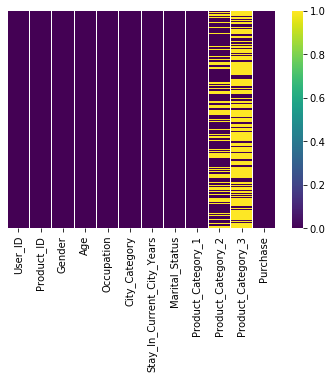

In [5]:
#Visualization of missing value
import seaborn as sns
sns.heatmap(data_train.isnull(), yticklabels=False, cmap='viridis')

In [6]:
def fillNaN_with_random(data):
    a = data.values
    m = np.isnan(a) 
    
    a[m] = np.random.randint(2, 18, size=m.sum())
    return data


In [7]:

print(data_train['Product_Category_2'])

print(data_test['Product_Category_2'])


0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 550068, dtype: float64
0         11.0
1          5.0
2         14.0
3          9.0
4          5.0
          ... 
233594     NaN
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 233599, dtype: float64


In [8]:
fillNaN_with_random(data_train['Product_Category_2'])
fillNaN_with_random(data_test['Product_Category_2'])

0         11.0
1          5.0
2         14.0
3          9.0
4          5.0
          ... 
233594     9.0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 233599, dtype: float64

In [10]:
category_column =['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years'] 
for x in category_column:
    print (x)
    print (data_train[x].value_counts())

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00160742       1
P00329042       1
P00314742       1
P00083142       1
P00336242       1
Name: Product_ID, Length: 3631, dtype: int64
Gender
M    414259
F    135809
Name: Gender, dtype: int64
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
City_Category
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [11]:
for col in category_column:
    b, c = np.unique(data_train[col], return_inverse=True) 
    data_train[col] = c

data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,2.0,NaN,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,2.0,NaN,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,2734,1,6,16,2,4,0,8,16.0,NaN,7969


In [12]:

for col in category_column:
    b, c = np.unique(data_test[col], return_inverse=True) 
    data_test[col] = c

data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,1144,1,4,7,1,2,1,1,11.0,NaN
1,1000009,994,1,2,17,2,0,0,3,5.0,NaN
2,1000010,2672,0,3,1,1,4,1,5,14.0,NaN
3,1000010,1299,0,3,1,1,4,1,4,9.0,NaN
4,1000011,519,0,2,1,2,1,0,4,5.0,12.0


In [13]:
def fillNaN_with_random(data_train):
    a = data_train.values
    m = np.isnan(a) # mask of NaNs
    
    a[m] = np.random.randint(2, 18, size=m.sum())
    return data_train

fillNaN_with_random(data_train['Product_Category_2'])
fillNaN_with_random(data_train['Product_Category_1'])

0          3
1          1
2         12
3         12
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category_1, Length: 550068, dtype: int64

In [14]:
fillNaN_with_random(data_test['Product_Category_2'])
fillNaN_with_random(data_test['Product_Category_1'])

0          1
1          3
2          5
3          4
4          4
          ..
233594     8
233595     5
233596     1
233597    10
233598     4
Name: Product_Category_1, Length: 233599, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeRegressor
train_pr=['Age','Product_Category_2']


model = DecisionTreeRegressor()

#set prediction data to factors that will predict, and set target to SalePrice
train_data = data_train[train_pr]
test_data = data_test[train_pr]
target = data_train.Purchase

#fitting model with prediction data and telling it my target
model.fit(train_data, target)

prediction=model.predict(test_data)
print(prediction)

[8520.95022624 8758.03100308 7219.22061856 ... 8758.03100308 9444.01183575
 8487.01894072]


In [16]:
prediction = prediction.reshape(len(prediction), 1)

dataTest = np.concatenate((data_test, prediction), axis = 1)
print(dataTest)
data_test['purchase prediction'] = prediction
data_test.sort_values('purchase prediction', inplace =True,ascending=False) 

data_test.head()

[[1.00000400e+06 1.14400000e+03 1.00000000e+00 ... 1.10000000e+01
             nan 8.52095023e+03]
 [1.00000900e+06 9.94000000e+02 1.00000000e+00 ... 5.00000000e+00
             nan 8.75803100e+03]
 [1.00001000e+06 2.67200000e+03 0.00000000e+00 ... 1.40000000e+01
             nan 7.21922062e+03]
 ...
 [1.00603600e+06 3.03000000e+02 0.00000000e+00 ... 5.00000000e+00
  1.20000000e+01 8.75803100e+03]
 [1.00603700e+06 1.10500000e+03 0.00000000e+00 ... 1.60000000e+01
             nan 9.44401184e+03]
 [1.00603900e+06 2.92100000e+03 0.00000000e+00 ... 5.00000000e+00
             nan 8.48701894e+03]]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,purchase prediction
46668,1005916,981,1,5,20,1,1,1,1,2.0,14.0,13019.189274
82971,1001717,252,0,5,6,1,1,0,8,2.0,NaN,13019.189274
4515,1001156,1656,0,5,2,0,4,0,1,2.0,14.0,13019.189274
120406,1005516,623,0,5,16,2,3,1,1,2.0,5.0,13019.189274
139205,1004153,736,1,5,17,1,3,1,1,2.0,15.0,13019.189274


In [17]:
#Drop the unnecessery variable
data_train.drop(['Product_Category_3'],axis=1,inplace=True)
data_test.drop(['Product_Category_3'],axis=1,inplace=True)

In [18]:
print("Original ")
print(data_train.shape)

print("\nAfter removing")
data_train = data_train.iloc[:data_test.shape[0]]

print(data_train.shape)


Original 
(550068, 11)

After removing
(233599, 11)


In [19]:
category_column =['purchase prediction'] 
for x in category_column:
    print (x)
    print (data_test[x].value_counts())


for col in category_column:
    b, c = np.unique(data_test[col], return_inverse=True) 
    data_test[col] = c

data_test.head()     

purchase prediction
9801.384661     12824
7135.980870     11107
12427.850129    10541
9797.358816      9549
9762.571494      8527
                ...  
8167.306548       143
8539.337539       132
7194.517483       125
9437.533632       100
7243.150000        14
Name: purchase prediction, Length: 119, dtype: int64


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,purchase prediction
46668,1005916,981,1,5,20,1,1,1,1,2.0,118
82971,1001717,252,0,5,6,1,1,0,8,2.0,118
4515,1001156,1656,0,5,2,0,4,0,1,2.0,118
120406,1005516,623,0,5,16,2,3,1,1,2.0,118
139205,1004153,736,1,5,17,1,3,1,1,2.0,118


In [20]:
category_column =['Purchase'] 
for x in category_column:
    print (x)
    print (data_train[x].value_counts())


for col in category_column:
    b, c = np.unique(data_train[col], return_inverse=True) 
    data_train[col] = c

data_train.head()     


Purchase
7089     92
7146     91
7093     91
6855     88
6891     87
         ..
13985     1
21253     1
6796      1
17031     1
23273     1
Name: Purchase, Length: 16162, dtype: int64


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,672,0,0,10,0,2,0,3,2.0,6199
1,1000001,2376,0,0,10,0,2,0,1,6.0,10983
2,1000001,852,0,0,10,0,2,0,12,2.0,438
3,1000001,828,0,0,10,0,2,0,12,14.0,346
4,1000002,2734,1,6,16,2,4,0,8,16.0,5798


In [21]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

#X=row_concat[['country of birth self','major occupation code','age','tax filer status']].values
X=data_train[['Purchase']].values

y= data_test[['purchase prediction']].values

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=902)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('The accuracy of the model using decision tree is',metrics.accuracy_score(predn,y_test))

The accuracy of the model using decision tree is 0.031378424657534244
